In [1]:
with open('input.txt', 'r') as f:
    lines = f.read().splitlines()

In [2]:
class tiles:

    def __init__(self, sketch):
        
        self.sketch = sketch

        # Store numbers of rows and columns in the sketch
        self.nrows = len(self.sketch)
        self.ncols = len(self.sketch[0])

        # Find the S in the sketch
        self.S_index = self.find_S()

    def find_S(self):
        # Find the S in the sketch
        for row in range(self.nrows):
            for col in range(self.ncols):
                if self.sketch[row][col] == 'S':
                    return (row, col)
                
    def get_connecting(self, row, col):

        # Get all connecting characters to the index (row, column)

        # The character at (row, col)
        current_character = self.sketch[row][col]

        if current_character == 'S':

            connecting = {}

            # Above
            if row-1 not in [-1, self.nrows]:
                if self.sketch[row-1][col] in ['|', '7', 'F']:
                    connecting[(row-1, col)] = self.sketch[row-1][col]
            
            # Below
            if row+1 not in [-1, self.nrows]:
                if self.sketch[row+1][col] in ['|', 'L', 'J']:
                    connecting[(row+1, col)] = self.sketch[row+1][col]

            # Left
            if col-1 not in [-1, self.ncols]:
                if self.sketch[row][col-1] in ['-', 'L', 'F']:
                    connecting[(row, col-1)] = self.sketch[row][col-1]

            # Right
            if col+1 not in [-1, self.ncols]:
                if self.sketch[row][col+1] in ['-', 'J', '7']:
                    connecting[(row, col+1)] = self.sketch[row][col+1]

        else:

            # Dictionary of how each character connects to adjacent characters
            connections_dict = {
                '|': [(row-1, col), (row+1, col)],
                '-': [(row, col-1), (row, col+1)],
                'L': [(row-1, col), (row, col+1)],
                'J': [(row-1, col), (row, col-1)],
                '7': [(row+1, col), (row, col-1)],
                'F': [(row+1, col), (row, col+1)],
            }

            connecting_indices = connections_dict[current_character]

            # Dictionary of characters that are connecting to the current character
            connecting = {
                (rowi, coli): self.sketch[rowi][coli] for rowi, coli in connecting_indices
                }

        return connecting
        
    def get_adjacent(self, row, col):
        # Get all adjacent characters to the index (row, column)
        adjacent = {}
        for rowi, coli in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
            if rowi in [-1, self.nrows]:
                continue
            if coli in [-1, self.ncols]:
                continue
            adjacent[(rowi,coli)] = self.sketch[rowi][coli]
        return adjacent

In [3]:
t = tiles(lines)

In [4]:
# Assuming there's a single point which is the furthest away from S, we can 
# track the paths along each direction and see where they meet

# Get the two pipes that connect to S. These are the starting points of each
# path we'll follow
S_connections = t.get_connecting(*t.S_index)

In [5]:
path1 = [t.S_index, list(S_connections.keys())[0]]
path2 = [t.S_index, list(S_connections.keys())[1]]

In [6]:
while path1[-1] != path2[-1]:

    # Get the connecting points to the last point in each path
    path1_connections = t.get_connecting(*path1[-1])
    path2_connections = t.get_connecting(*path2[-1])

    # Determine the next point in the path
    for c in path1_connections.keys():
        if c not in path1:
            path1_next = c
            
    for c in path2_connections.keys():
        if c not in path2:
            path2_next = c

    # Append the next point to each path
    path1.append(path1_next)
    path2.append(path2_next)

In [7]:
print(len(path1) - 1)

6786


In [8]:
import matplotlib.pyplot as plt

In [9]:
path = path1 + path2[1:-1][::-1]

In [10]:
x_coords = [p[1] for p in path1] + [p[1] for p in path2[1:-1][::-1]]
y_coords = [p[0] for p in path1] + [p[0] for p in path2[1:-1][::-1]]

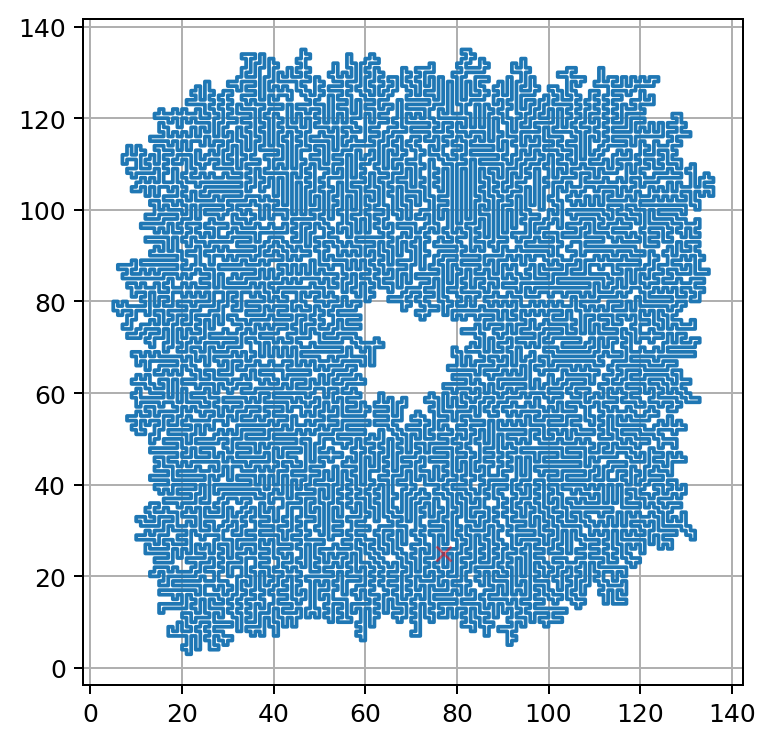

In [11]:
fig, ax = plt.subplots(dpi=180)
ax.set_aspect('equal')

ax.plot(x_coords, y_coords) #, linewidth=20)
ax.plot(x_coords[0], y_coords[0], 'x', color='red', alpha=0.5)

ax.grid()

fig.savefig('output.png', bbox_inches='tight', dpi=360)

In [12]:
inside_coords = []

# path = path[::-1]

for i in range(len(path)):

    if i == 0:
        previous = path[0]

    else:
        current = path[i]

        drow = current[0] - previous[0]
        dcol = current[1] - previous[1]

        # Downwards
        if drow == 1:
            proposed = [
                (current[0]-1, current[1]-1), 
                (current[0], current[1]-1), 
                # (current[0]+1, current[1]-1)
                ]

        # Upwards
        elif drow == -1:
            proposed = [
                # (current[0]-1, current[1]+1),
                (current[0], current[1]+1),
                (current[0]+1, current[1]+1)
                ]

        # Rightwards
        elif dcol == 1:
            proposed = [
                (current[0]+1, current[1]-1),
                (current[0]+1, current[1]),
                # (current[0]+1, current[1]+1)
                ]

        # Leftwards
        elif dcol == -1:
            proposed = [
                # (current[0]-1, current[1]-1),
                (current[0]-1, current[1]),
                (current[0]-1, current[1]+1)
                ]
        
        for p in proposed:
            if (p not in path) and (p not in inside_coords):
                inside_coords.append(p)

        previous = current

In [13]:
while True:

    new_point = False

    for row, col in inside_coords:
            
        for proposed in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
            if (proposed not in path) and (proposed not in inside_coords):
                inside_coords.append(proposed)
                new_point = True
    
    print(len(inside_coords))
    if not new_point:
        break

495
495


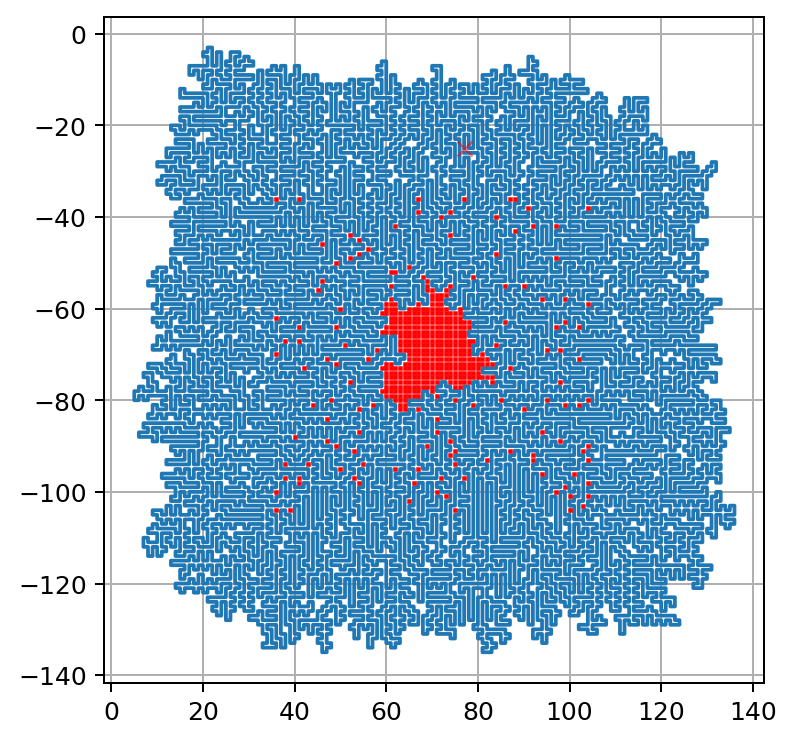

In [21]:
import numpy as np

fig, ax = plt.subplots(dpi=180)
ax.set_aspect('equal')

ax.plot([c[1] for c in path], - np.array([c[0] for c in path]))
ax.plot(
    [c[1] for c in inside_coords], 
    -np.array([c[0] for c in inside_coords]), 
    's', 
    color='red',
    markersize=1
    )
ax.plot(x_coords[0], -y_coords[0], 'x', color='red', alpha=0.5)

ax.grid()

fig.savefig('output.png', bbox_inches='tight', dpi=360)

In [15]:
print(len(inside_coords))

495
